## PLAYSTORE APP'S RATINGS

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# getting data

df = pd.read_csv('googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Mean rating is 4.19 and median is 4.30.

In [ ]:
df.describe(include=[object])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# checking percent of null values in dependent column

(df['Rating'].isnull().sum()/df['Rating'].isnull().count())*100

13.596531685268886

## Handling Erroneous Data

While checking 'Rating' column we have seen a max Rating of 19 present, which is generally not possible. So lets analyse that.

In [ ]:
df[df['Rating']>15]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


For row 10472 'Category' is missing, thus rest of the values got shifted. So we need to handle this. By checking from Google Play Store we can find that it's Category is 'Lifestyle'. So updating all values for that row.

In [ ]:
df.loc[10472]=['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE',1.9,'19','3.0M','1,000+','Free','0','Everyone','Lifestyle','February 11, 2018','1.0.19','4.0 and up']
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                          Lifestyle
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [ ]:
df.loc[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


## Data Cleaning

### Rating

In [ ]:
# taking null ratings in df_ratingna

df_ratingna = df[df['Rating'].isnull()]
df_ratingna.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [ ]:
df_ratingna['Content Rating'].value_counts()

Everyone        1294
Teen             124
Mature 17+        38
Everyone 10+      17
Unrated            1
Name: Content Rating, dtype: int64

We will take only 'Rating' not null rows into dataframe.

In [ ]:
# 'Rating' not null rows

df = df[df['Rating'].notna()]

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [ ]:
df.shape

(9367, 13)

In [ ]:
df1 = df.copy()

### Current Ver

In [ ]:
df['Current Ver'].value_counts().head()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

In [ ]:
df['Current_Ver_Upd'] = df['Current Ver']

In [ ]:
df['Current_Ver_Upd'] = df['Current_Ver_Upd'].replace(np.nan,'Varies with device')

In [ ]:
df['Current_Ver_Upd'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
1.18.34                  1
300000.0.78              1
10.23.2-964159b          1
8.1.10.41                1
2.3.14                   1
Name: Current_Ver_Upd, Length: 2638, dtype: int64

In [ ]:
# formatting values

import re

df['Current_Ver_Upd'] = df['Current_Ver_Upd'].apply(lambda x: 'Varies with device' 
                                                    if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0]) 

In [ ]:
df['Current_Ver_Upd'].unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '3.3', '9.1',
       '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2', '3.5',
       '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3', '6.3',
       '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5', '9.9',
       '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1', '6.6',
       '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0', '8.0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

In [ ]:
df['Current_Ver_Upd'].value_counts()

Varies with device    1419
1.0                   1192
1.1                    618
1.2                    451
2.0                    333
                      ... 
8.6                      4
8.5                      4
9                        3
9.9                      3
8.7                      3
Name: Current_Ver_Upd, Length: 112, dtype: int64

In [ ]:
df['Current_Ver_Upd'] = df['Current_Ver_Upd'].replace('','Varies with device')

In [ ]:
df['Current_Ver_Upd'] = df['Current_Ver_Upd'].replace('Varies with device','1.0')

In [ ]:
df['Current_Ver_Upd'].value_counts()

1.0    2715
1.1     618
1.2     451
2.0     333
1.3     292
       ... 
9.6       4
9.5       4
9         3
8.7       3
9.9       3
Name: Current_Ver_Upd, Length: 110, dtype: int64

In [ ]:
df['Current_Ver_Upd'] = pd.to_numeric(df['Current_Ver_Upd'])

### Android Ver

In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up'], dtype=object)

In [ ]:
df['Android_Ver_Upd'] = df['Android Ver']

In [ ]:
df['Android_Ver_Upd'].isnull().sum()

2

In [ ]:
df['Android_Ver_Upd'] = df['Android_Ver_Upd'].replace(np.nan,'Varies with device')

In [ ]:
import re

df['Android_Ver_Upd'] = df['Android_Ver_Upd'].apply(lambda x: 'Varies with device' 
                                                    if x=='Varies with device'  else  re.findall('^[0-9]',str(x))[0]) 

In [ ]:
df['Android_Ver_Upd'].unique()

array(['4', '2', '3', 'Varies with device', '5', '6', '1', '7', '8'],
      dtype=object)

In [ ]:
df['Android_Ver_Upd'].value_counts()

4                     5860
Varies with device    1321
2                     1177
5                      556
3                      250
1                      105
6                       48
7                       45
8                        5
Name: Android_Ver_Upd, dtype: int64

In [ ]:
df['Android_Ver_Upd'] = df['Android_Ver_Upd'].replace('Varies with device','4') #replacing with mode 4

In [ ]:
df['Android_Ver_Upd'].value_counts()

4    7181
2    1177
5     556
3     250
1     105
6      48
7      45
8       5
Name: Android_Ver_Upd, dtype: int64

In [ ]:
df['Android_Ver_Upd'] = pd.to_numeric(df['Android_Ver_Upd'])

### Installs

In [ ]:
df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             714
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [ ]:
# removing '+' and ',' from Installs column

df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))

In [ ]:
df['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           714
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [ ]:
# converting type of Installs from object to integer

df['Installs'] = pd.to_numeric(df['Installs'])

### Price

In [ ]:
# stripping $ sign

df['Price'] = df['Price'].apply(lambda x: x.strip('$'))

In [ ]:
df['Price'] = pd.to_numeric(df['Price'])

### Size

In [ ]:
df['Size'].value_counts().head()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
Name: Size, dtype: int64

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
df['Size_Upd'] = df['Size'].apply(lambda a: str(a).replace('M', ''))

In [ ]:
df['Size_Upd'] = df['Size_Upd'].apply(lambda a: float(str(a).replace('k', ''))/1000 if 'k' in str(a) else a)

In [ ]:
df['Size_Upd'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', 0.201, '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '7.0', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '22', '6.4', '3.2', '8.2', '4.9', '9.5', '5.0', '5.9', '13',
       '73', '6.8', '3.5', '4.0', '2.3', '2.1', '42', '9.1', '55', 0.023,
       '7.3', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       0.079, '8.4', '3.7', 0.118, '44', 0.695, '1.6', '6.2', '53', '1.4',
       '3.0', '7.2', '5.8', '3.8', '9.6', '45', '63', '49', '77', '4.4',
       '70', '9.3', '8.1', '36', '6.9', '7.4', '84', '97', '

In [ ]:
df['Size_Upd'].value_counts()

Varies with device    1637
14                     166
12                     161
11                     160
15                     159
                      ... 
0.122                    1
0.442                    1
0.103                    1
0.903                    1
0.556                    1
Name: Size_Upd, Length: 414, dtype: int64

In [ ]:
df['Size_Upd'] = df['Size_Upd'].apply(lambda a: str(a).replace('Varies with device', '14'))

In [ ]:
df['Size_Upd'] = pd.to_numeric(df['Size_Upd'])

### Last Updated

In [ ]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [ ]:
# Converting date to datetime format

from datetime import datetime, date
temp = pd.to_datetime(df['Last Updated'])
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [ ]:
df['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
df['Last_Updated_Days'].head()

0   1169 days
1   1161 days
2    963 days
3   1017 days
4   1005 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

In [ ]:
df['Last_Updated_Days'] = df['Last_Updated_Days'].dt.days
df['Last_Updated_Days'] = pd.to_numeric(df['Last_Updated_Days'])
df['Last_Updated_Days'].head()

0    1169
1    1161
2     963
3    1017
4    1005
Name: Last_Updated_Days, dtype: int64

### Content Rating

In [ ]:
df['Content Rating'].value_counts()

Everyone           7421
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
df['Content_Rating'] = df['Content Rating']

In [ ]:
df[df['Content_Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1.3,2,6.4,3310,Unrated


In [ ]:
df.loc[df['Content_Rating']=='Unrated', 'Content_Rating'] = 'Everyone'

Changing one 'Unrated' app to 'Everyone'.

In [ ]:
df[df['Content_Rating']=='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up,1.1,4,4.9,991,Adults only 18+
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up,3.2,4,41.0,971,Adults only 18+
6424,Manga Books,COMICS,3.8,7326,Varies with device,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device,1.0,4,14.0,961,Adults only 18+


In [ ]:
df.loc[df['Content_Rating']=='Adults only 18+', 'Content_Rating'] = 'Mature 17+'

Changing 'Adults only 18+' to 'Mature 17+' as there were to less values for Adult.

In [ ]:
df['Content_Rating'].value_counts()

Everyone        7422
Teen            1084
Mature 17+       464
Everyone 10+     397
Name: Content_Rating, dtype: int64

### Other Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                9367 non-null   object 
 1   Category           9367 non-null   object 
 2   Rating             9367 non-null   float64
 3   Reviews            9367 non-null   object 
 4   Size               9367 non-null   object 
 5   Installs           9367 non-null   int64  
 6   Type               9367 non-null   object 
 7   Price              9367 non-null   float64
 8   Content Rating     9367 non-null   object 
 9   Genres             9367 non-null   object 
 10  Last Updated       9367 non-null   object 
 11  Current Ver        9363 non-null   object 
 12  Android Ver        9365 non-null   object 
 13  Current_Ver_Upd    9367 non-null   float64
 14  Android_Ver_Upd    9367 non-null   int64  
 15  Size_Upd           9367 non-null   float64
 16  Last_Updated_Days  9367

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.0,4,19.0,1169,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2.0,4,14.0,1161,Everyone


In [ ]:
df = df.drop(['Size', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Content Rating'], axis = 1) 
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,1.0,4,19.0,1169,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,2.0,4,14.0,1161,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,1.2,4,8.7,963,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,1.0,4,25.0,1017,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,1.1,4,2.8,1005,Everyone


In [ ]:
df2 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App                9367 non-null   object 
 1   Category           9367 non-null   object 
 2   Rating             9367 non-null   float64
 3   Reviews            9367 non-null   int64  
 4   Installs           9367 non-null   int64  
 5   Type               9367 non-null   object 
 6   Price              9367 non-null   float64
 7   Current_Ver_Upd    9367 non-null   float64
 8   Android_Ver_Upd    9367 non-null   int64  
 9   Size_Upd           9367 non-null   float64
 10  Last_Updated_Days  9367 non-null   int64  
 11  Content_Rating     9367 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 951.3+ KB


## Exploratory Data Analysis

In [ ]:
df.describe()

,Rating,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days
count,9367.000000,9.367000e+03,9.367000e+03,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000
mean,4.191513,5.139950e+05,1.789553e+07,0.960825,2.300021,3.774528,21.390023,1207.586207
std,0.515735,3.143879e+06,9.123353e+07,15.815743,1.829413,0.843245,21.567705,396.455400
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,1.000000,0.008500,956.000000
25%,4.000000,1.860000e+02,1.000000e+04,0.000000,1.000000,4.000000,6.600000,971.000000
50%,4.300000,5.928000e+03,5.000000e+05,0.000000,1.400000,4.000000,14.000000,1024.000000
75%,4.500000,8.152250e+04,5.000000e+06,0.000000,3.000000,4.000000,27.000000,1259.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,9.900000,8.000000,100.000000,3957.000000


Mean value for Rating is 4.19 whereas Median value is 4.30. Mean value for Price column is $0.96.

In [ ]:
# finding range of Price

df['Price'].max()-df['Price'].min()

400.0

In [ ]:
# finding standard deviation

df.std()

Rating               5.157352e-01
Reviews              3.143879e+06
Installs             9.123353e+07
Price                1.581574e+01
Current_Ver_Upd      1.829413e+00
Android_Ver_Upd      8.432446e-01
Size_Upd             2.156771e+01
Last_Updated_Days    3.964554e+02
dtype: float64

In [ ]:
# finding variance

df.var()

Rating               2.659828e-01
Reviews              9.883974e+12
Installs             8.323558e+15
Price                2.501377e+02
Current_Ver_Upd      3.346752e+00
Android_Ver_Upd      7.110615e-01
Size_Upd             4.651659e+02
Last_Updated_Days    1.571769e+05
dtype: float64

Standard Deviation tells us how spread out numbers are. For Price, the standard deviation is 0.158 and the variance is 0.25.

In [ ]:
# First quartile (Q1) of Rating
Q1 = np.percentile(df['Rating'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) of Rating
Q3 = np.percentile(df['Rating'], 75, interpolation = 'midpoint') 
  
# Interquartile range (IQR) of Rating
IQR = Q3 - Q1 

IQR

0.5

The Inter Quartile Range for “Rating” is 0.5. The interquartile range tells us how far apart the first and third quartile are. It indicates how spread out the middle 50% of our set of data is.

In [ ]:
#finding kurtosis
df.kurtosis()

Rating                 5.788987
Reviews              295.128756
Installs              86.235084
Price                604.642718
Current_Ver_Upd        2.494238
Android_Ver_Upd        2.682656
Size_Upd               2.581129
Last_Updated_Days      6.301378
dtype: float64

In [ ]:
#finding skewness on columns
df.skew(axis = 0)

Rating               -1.851895
Reviews              15.308659
Installs              8.888807
Price                24.403572
Current_Ver_Upd       1.696706
Android_Ver_Upd      -0.964233
Size_Upd              1.725466
Last_Updated_Days     2.389048
dtype: float64

'Rating' is Left Skewed or Negatively Skewed.  Kurtosis is around 5.78 for 'Rating' that means data is above normal distribution and it has large outliers. 'Installs' is Positive Skewed with Kurtosis around 86.2. 'Price' is also Positive Skewed with Kurtosis around 604.6.

## Some Findings

In [ ]:
print("Number of Apps with 5 ratings : ",df['Rating'][df['Rating'] == 5].count())

Number of Apps with 5 ratings :  274


#### There are 274 Apps in the store which has 5.0 Ratings.

In [ ]:
# Finding costliest App

df[df['Price']==df['Price'].max()]

,App,Category,Rating,Reviews,Installs,Type,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,10000,Paid,400.0,1.0,4,7.3,1053,Everyone


#### The most costly App in the Store is : I'm Rich - Trump Edition costing $400.

In [ ]:
print("Free apps in the Playstore is : ",df['Price'][df['Price']==0].count())

Free apps in the Playstore is :  8720


Number of free apps in the Playstore is 8720.

## Univariate Analysis

Text(0, 0.5, 'Frequency')

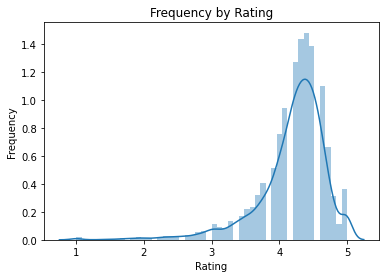

In [ ]:
sns.distplot(df['Rating'])
plt.title('Frequency by Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Rating has negatively skewed data.

Text(0, 0.5, 'Frequency')

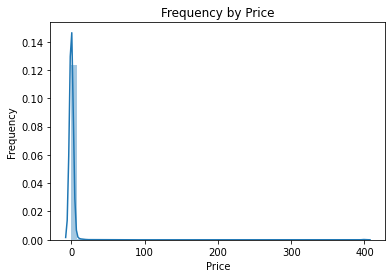

In [ ]:
sns.distplot(df['Price'])
plt.title('Frequency by Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

Price is right skewed/positively skewed.

Text(0, 0.5, 'Frequency')

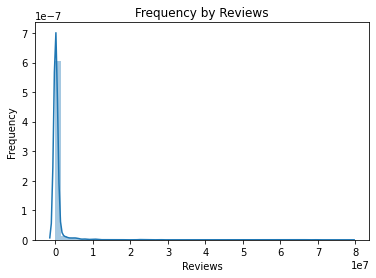

In [ ]:
sns.distplot(df['Reviews'])
plt.title('Frequency by Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')

Reviews is right skewed/positively skewed.

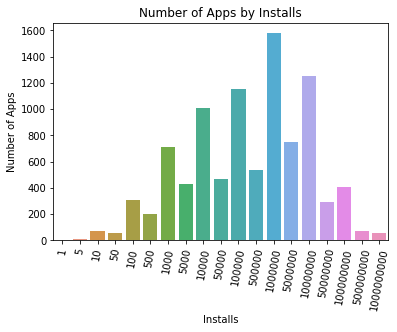

In [ ]:
sns.countplot(df['Installs'])
plt.xticks(rotation=80)
plt.title('Number of Apps by Installs')
plt.xlabel('Installs')
plt.ylabel('Number of Apps')
plt.show()

The Installs category of 1 million + has the highest number of apps.

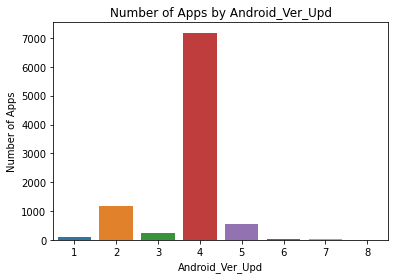

In [ ]:
sns.countplot(df['Android_Ver_Upd'])
plt.xticks()
plt.title('Number of Apps by Android_Ver_Upd')
plt.xlabel('Android_Ver_Upd')
plt.ylabel('Number of Apps')
plt.show()

Majority of the apps has Android version 4.

## Understanding 'Content Rating'

In [ ]:
df['Content_Rating'].value_counts()

Everyone        7422
Teen            1084
Mature 17+       464
Everyone 10+     397
Name: Content_Rating, dtype: int64

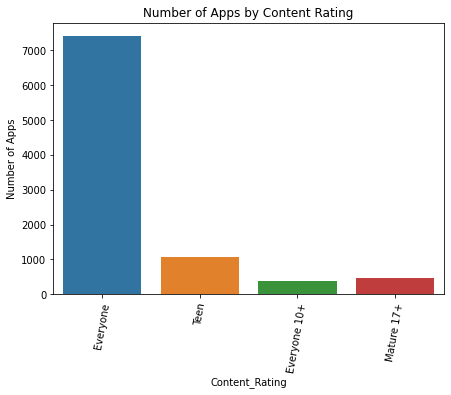

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(df['Content_Rating'])
plt.xticks(rotation=80)
plt.title('Number of Apps by Content Rating')
plt.xlabel('Content_Rating')
plt.ylabel('Number of Apps')
plt.show()

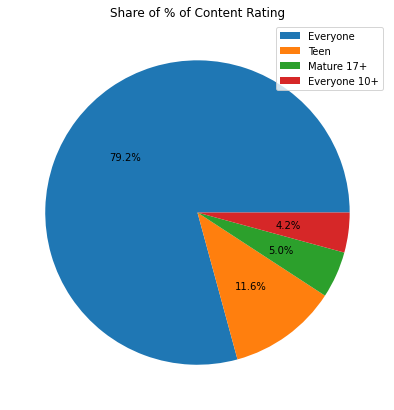

In [ ]:
plt.figure(figsize=(12,7))
plt.pie(df['Content_Rating'].value_counts(), labels=['','','',''], autopct='%.1f%%') #display % till 1 decimal place
plt.title('Share of % of Content Rating')
plt.legend(labels=['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+'])

#### Content Rating category 'EVERYONE' has the maximum share percentage of around 79%, whereas, Content Rating category 'EVERYONE 10+'  has the least share.

## Understanding 'Category'

Text(0.5, 0, 'Number of Apps')

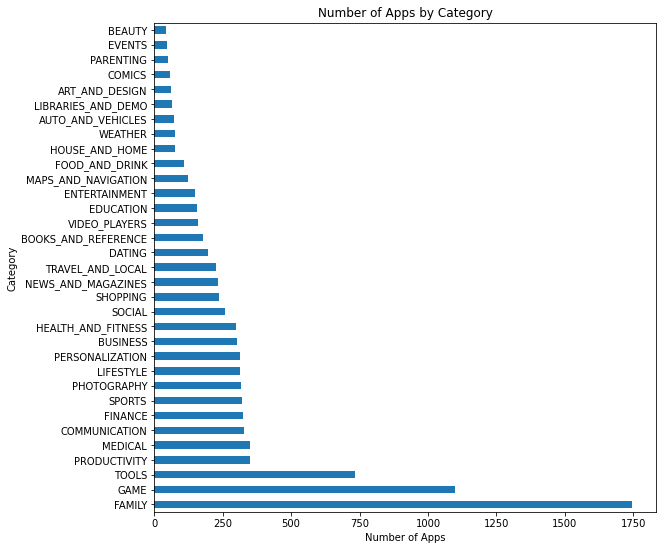

In [ ]:
df['Category'].value_counts().plot(kind='barh',figsize=(9,9))
plt.title('Number of Apps by Category')
plt.ylabel('Category')
plt.xlabel('Number of Apps')

#### The horizontal bar plot shows that the maximum number of apps belong to the Family Category, followed by Game category. The least number of apps belong to the Beauty category.

## Bivariate Analysis

In [ ]:
cat_rate = df.groupby(['Category']).agg({'Rating':'mean'}).reset_index().sort_values(by='Rating')
cat_rate.head()

,Category,Rating
7,DATING,3.970769
29,TOOLS,4.047411
19,MAPS_AND_NAVIGATION,4.051613
31,VIDEO_PLAYERS,4.063750
18,LIFESTYLE,4.087937


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

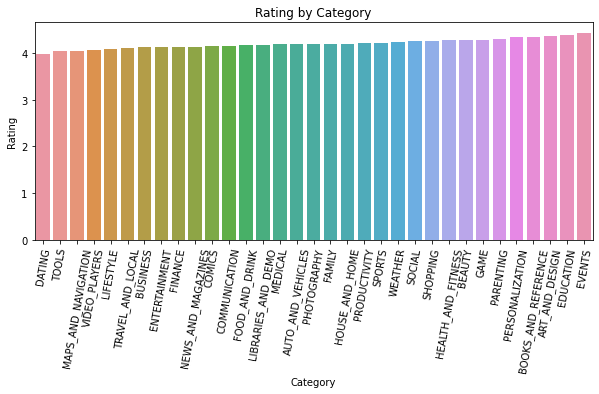

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(cat_rate['Category'], cat_rate['Rating'])
plt.title('Rating by Category')
plt.xticks(rotation=80)

#### 'EVENTS' category has the highest mean rating followed by 'EDUCATION'. Meanwhile, 'DATING' category has the lowest mean rating.

In [ ]:
content_rate = df.groupby(['Content_Rating']).agg({'Rating':'mean'}).reset_index().sort_values(by='Rating')
content_rate.head()

,Content_Rating,Rating
2,Mature 17+,4.124569
0,Everyone,4.186055
3,Teen,4.233487
1,Everyone 10+,4.257179


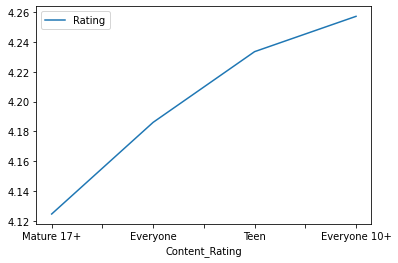

In [ ]:
content_rate.plot(x ='Content_Rating', y='Rating', kind = 'line')
plt.show()

Apps with 'Everyone 10+' category has the highest mean rating and 'Mature 17+' has the lowest mean rating.

Text(0.5, 1.0, 'Rating by Content Rating')

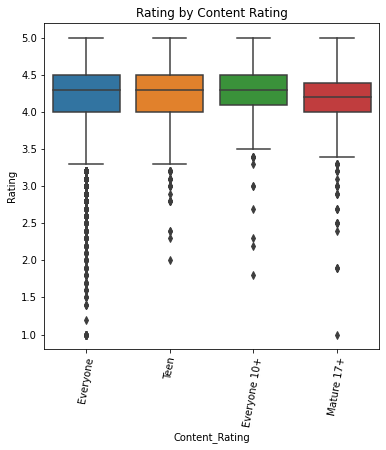

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(df['Content_Rating'], df['Rating'])
plt.xticks(rotation=80)
plt.title('Rating by Content Rating')

#### Inter quartile range for Everyone and Teen categories is greater than Mature 17+ and Everyone 10+ categories. It means Everyone and Teen has more dispersed data.

Text(0.5, 1.0, 'Rating by Installs')

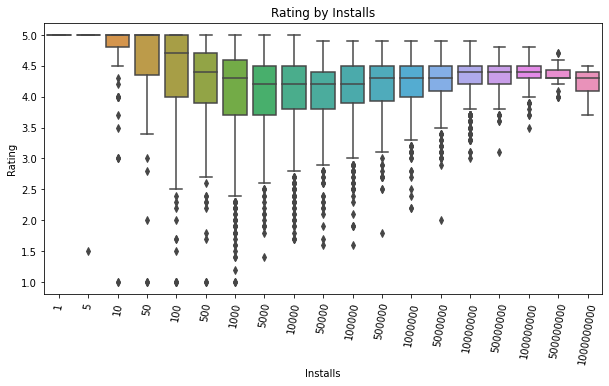

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Installs'], df['Rating'])
plt.xticks(rotation=80)
plt.title('Rating by Installs')

In [ ]:
content_price = df.groupby(['Content_Rating']).agg({'Price':'mean'}).reset_index().sort_values(by='Price')
content_price.head()

,Content_Rating,Price
2,Mature 17+,0.243815
1,Everyone 10+,0.394685
3,Teen,0.577343
0,Everyone,1.091942


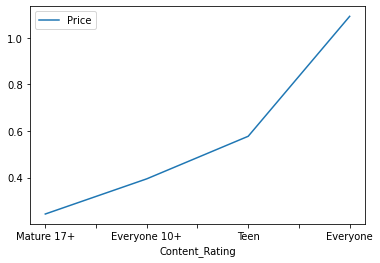

In [ ]:
content_price.plot(x ='Content_Rating', y='Price', kind = 'line')
plt.show()

Apps having Content Rating 'Mature 17+' has lowest average Price, where as, 'Everyone' category has highest average price.

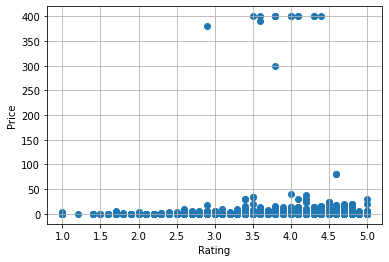

In [ ]:
plt.scatter(df['Rating'], df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.grid()
plt.show()

Majority of the apps priced above $50 has a rating between 3.5 to 4.5.

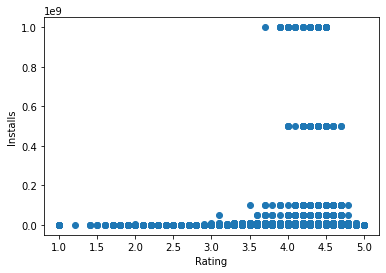

In [ ]:
plt.scatter(df['Rating'], df['Installs'])
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

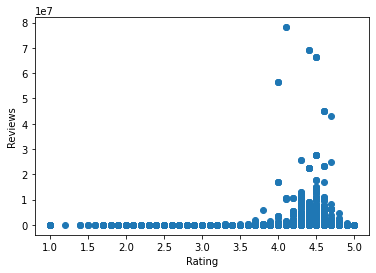

In [ ]:
plt.scatter(df['Rating'], df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

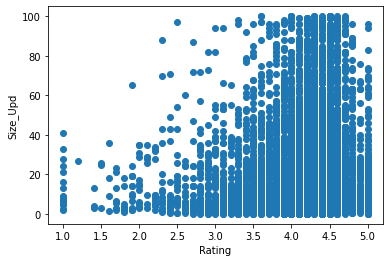

In [ ]:
plt.scatter(df['Rating'], df['Size_Upd'])
plt.xlabel('Rating')
plt.ylabel('Size_Upd')
plt.show()

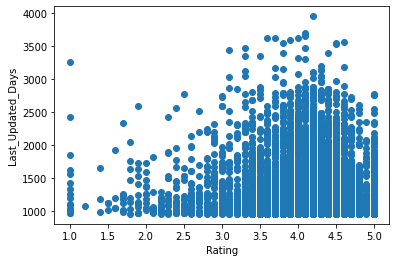

In [ ]:
plt.scatter(df['Rating'], df['Last_Updated_Days'])
plt.xlabel('Rating')
plt.ylabel('Last_Updated_Days')
plt.show()

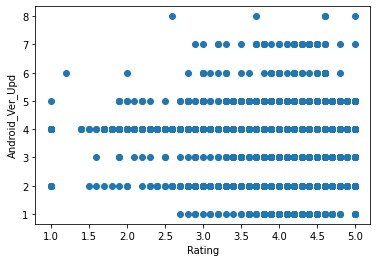

In [ ]:
plt.scatter(df['Rating'], df['Android_Ver_Upd'])
plt.xlabel('Rating')
plt.ylabel('Android_Ver_Upd')
plt.show()

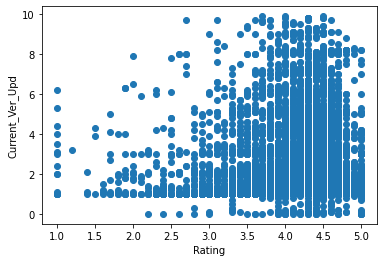

In [ ]:
plt.scatter(df['Rating'], df['Current_Ver_Upd'])
plt.xlabel('Rating')
plt.ylabel('Current_Ver_Upd')
plt.show()

## Chi Square Test

H0 : Type and Content Rating are dependent.

H1 : Type and Content Rating are independent.

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency 
from scipy.stats import chi2

table = pd.crosstab(df['Type'], df['Content_Rating'])
print(table)

Content_Rating  Everyone  Everyone 10+  Mature 17+  Teen
Type                                                    
Free                6870           364         447  1039
Paid                 552            33          17    45


In [ ]:
fstat, p, dof, expected = chi2_contingency(table) 
print("Expected values: ")
print(expected)
print("Degrees of Freedom: ", dof)
print("F-statistic: ", fstat)
print('P-value: ', p)

Expected values: 
[[6909.34557489  369.57830682  431.9504644  1009.12565389]
 [ 512.65442511   27.42169318   32.0495356    74.87434611]]
Degrees of Freedom:  3
F-statistic:  24.85798153313377
P-value:  1.6533018408627862e-05


In [ ]:
prob = 0.95 # means level of significance is 0.05
fcritical = chi2.ppf(prob, dof)

if abs(fstat) >= fcritical:
    print('Reject Ho, so Type and Content Rating are not dependent.')
else:
    print('Fail to reject Ho, so Type and Content Rating are dependent.')

Reject Ho, so Type and Content Rating are not dependent.


So with 95% confidence we can say that Type and Content Rating are not dependent.

## T-Test

H0 : Rating of free and paid apps is same.

H1 : Rating of free and paid apps is different.

In [ ]:
df.groupby(['Type'])['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8720.0,4.185940,0.512893,1.0,4.0,4.3,4.5,5.0
Paid,647.0,4.266615,0.547523,1.0,4.1,4.4,4.6,5.0


In [ ]:
from statsmodels.stats.weightstats import ttest_ind as ttest

t1 = df[df['Type']=='Free']['Rating']
t2 = df[df['Type']=='Paid']['Rating']

test = ttest(t1, t2)
print("P-value is: ", test[1])
alpha = 0.05

if test[1]<alpha:
    print("Null Hypothesis is rejected which means the rating of free and paid apps is different.")
else:
    print("Fail to reject null hypothesis which means the rating of free and paid apps is same.")

P-value is:  0.00012291887036802515
Null Hypothesis is rejected which means the rating of free and paid apps is different.


So with 95% confidence we can say that rating of free and paid apps is different.

## ANOVA for F-Test

H0 : Mean Rating for all Content Ratings is same.

H1 : Mean Rating for one or more Content Ratings is different.

In [ ]:
df.groupby(['Content_Rating'])['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Content_Rating,,,,,,,,
Everyone,7422.0,4.186055,0.537960,1.0,4.0,4.3,4.5,5.0
Everyone 10+,397.0,4.257179,0.367259,1.8,4.1,4.3,4.5,5.0
Mature 17+,464.0,4.124569,0.505135,1.0,4.0,4.2,4.4,5.0
Teen,1084.0,4.233487,0.391595,2.0,4.0,4.3,4.5,5.0


In [ ]:
from scipy.stats import f_oneway

f1 = df[df['Content_Rating']=='Everyone']['Rating']
f2 = df[df['Content_Rating']=='Everyone 10+']['Rating']
f3 = df[df['Content_Rating']=='Mature 17+']['Rating']
f4 = df[df['Content_Rating']=='Teen']['Rating']

fstat, pval = stats.f_oneway(f1, f2)
print("P-value is: ", pval)
alpha = 0.05

if pval<alpha:
    print("Null Hypothesis is rejected which means the mean rating for all Content Ratings is not same.")
else:
    print("Fail to reject null hypothesis which means the mean rating for all Content Ratings is same.")

P-value is:  0.009286891253576332
Null Hypothesis is rejected which means the mean rating for all Content Ratings is not same.


So with 95% confidence we can say that the mean rating for one or more Content Ratings is different.

## Handling Categorical Values

In [ ]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,1.0,4,19.0,1169,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,2.0,4,14.0,1161,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,1.2,4,8.7,963,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,1.0,4,25.0,1017,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,1.1,4,2.8,1005,Everyone


In [ ]:
df = df.drop(['App'], axis = 1)
df.head()

,Category,Rating,Reviews,Installs,Type,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating
0,ART_AND_DESIGN,4.1,159,10000,Free,0.0,1.0,4,19.0,1169,Everyone
1,ART_AND_DESIGN,3.9,967,500000,Free,0.0,2.0,4,14.0,1161,Everyone
2,ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,1.2,4,8.7,963,Everyone
3,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,1.0,4,25.0,1017,Teen
4,ART_AND_DESIGN,4.3,967,100000,Free,0.0,1.1,4,2.8,1005,Everyone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           9367 non-null   object 
 1   Rating             9367 non-null   float64
 2   Reviews            9367 non-null   int64  
 3   Installs           9367 non-null   int64  
 4   Type               9367 non-null   object 
 5   Price              9367 non-null   float64
 6   Current_Ver_Upd    9367 non-null   float64
 7   Android_Ver_Upd    9367 non-null   int64  
 8   Size_Upd           9367 non-null   float64
 9   Last_Updated_Days  9367 non-null   int64  
 10  Content_Rating     9367 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.shape

(9367, 11)

In [ ]:
df['Content_Rating'].value_counts()

Everyone        7422
Teen            1084
Mature 17+       464
Everyone 10+     397
Name: Content_Rating, dtype: int64

In [ ]:
content_rating_dict = {'Everyone':1, 'Everyone 10+':2, 'Teen':3, 'Mature 17+':4}

df['Content_Rating'] = df['Content_Rating'].map(content_rating_dict)
df['Content_Rating'].value_counts()

1    7422
3    1084
4     464
2     397
Name: Content_Rating, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
df['Category']= le.fit_transform(df['Category']) 
df['Category'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

In [ ]:
dummies = pd.get_dummies(df['Type'],drop_first=True)
dummies.head()

,Paid
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.concat([df,dummies],axis=1)
df = df.drop(['Type'],axis=1)
df.head()

,Category,Rating,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid
0,0,4.1,159,10000,0.0,1.0,4,19.0,1169,1,0
1,0,3.9,967,500000,0.0,2.0,4,14.0,1161,1,0
2,0,4.7,87510,5000000,0.0,1.2,4,8.7,963,1,0
3,0,4.5,215644,50000000,0.0,1.0,4,25.0,1017,3,0
4,0,4.3,967,100000,0.0,1.1,4,2.8,1005,1,0


## Check Correlation and Multicollinearity

In [ ]:
corr_matrix = df.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating               1.000000
Reviews              0.068147
Size_Upd             0.067809
Android_Ver_Upd      0.062427
Installs             0.051393
Paid                 0.039668
Content_Rating       0.005625
Current_Ver_Upd     -0.005693
Price               -0.021851
Category            -0.034636
Last_Updated_Days   -0.142552
Name: Rating, dtype: float64

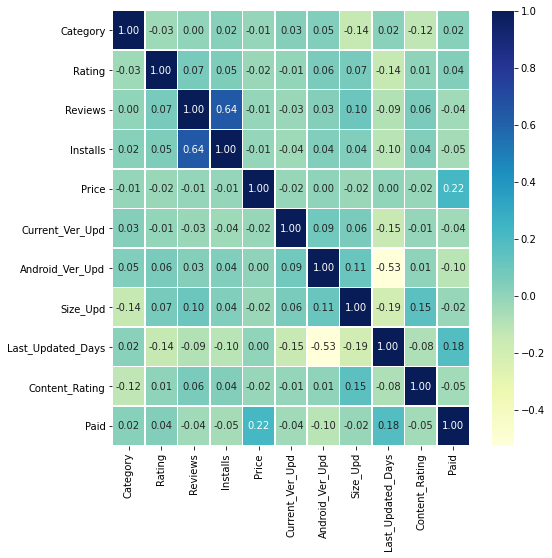

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=df.columns).T

,Category,Rating,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid
vif,5.174648,33.626951,1.765941,1.777978,1.059218,2.601669,19.488973,2.148089,9.379857,3.640054,1.175048


In [ ]:
df.describe()

,Category,Rating,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid
count,9367.000000,9367.000000,9.367000e+03,9.367000e+03,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000
mean,16.799829,4.191513,5.139950e+05,1.789553e+07,0.960825,2.300021,3.774528,21.390023,1207.586207,1.422440,0.069072
std,8.276671,0.515735,3.143879e+06,9.123353e+07,15.815743,1.829413,0.843245,21.567705,396.455400,0.879051,0.253591
min,0.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,1.000000,0.008500,956.000000,1.000000,0.000000
25%,11.000000,4.000000,1.860000e+02,1.000000e+04,0.000000,1.000000,4.000000,6.600000,971.000000,1.000000,0.000000
50%,14.000000,4.300000,5.928000e+03,5.000000e+05,0.000000,1.400000,4.000000,14.000000,1024.000000,1.000000,0.000000
75%,25.000000,4.500000,8.152250e+04,5.000000e+06,0.000000,3.000000,4.000000,27.000000,1259.000000,1.000000,0.000000
max,32.000000,5.000000,7.815831e+07,1.000000e+09,400.000000,9.900000,8.000000,100.000000,3957.000000,4.000000,1.000000


## OLS Regression - Run 1

In [ ]:
X = df.drop(['Rating'], axis=1)
y = df['Rating']
X.head()

,Category,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid
0,0,159,10000,0.0,1.0,4,19.0,1169,1,0
1,0,967,500000,0.0,2.0,4,14.0,1161,1,0
2,0,87510,5000000,0.0,1.2,4,8.7,963,1,0
3,0,215644,50000000,0.0,1.0,4,25.0,1017,3,0
4,0,967,100000,0.0,1.1,4,2.8,1005,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000002,0.00001,0.0,0.101010,0.428571,0.189931,0.070976,0.000000,0.0
1,0.0,0.000012,0.00050,0.0,0.202020,0.428571,0.139927,0.068311,0.000000,0.0
2,0.0,0.001120,0.00500,0.0,0.121212,0.428571,0.086922,0.002333,0.000000,0.0
3,0.0,0.002759,0.05000,0.0,0.101010,0.428571,0.249936,0.020327,0.666667,0.0
4,0.0,0.000012,0.00010,0.0,0.111111,0.428571,0.027917,0.016328,0.000000,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_with_constant = sm.add_constant(X_train)
y_train = y_train.values.reshape(-1,1)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()
results.params

const    4.300194
0       -0.070697
1        0.611720
2        0.013903
3       -0.461751
4       -0.057510
5       -0.073660
6        0.062984
7       -0.652638
8       -0.030810
9        0.143982
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     21.67
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           2.71e-40
Time:                        05:25:10   Log-Likelihood:                -4925.6
No. Observations:                6556   AIC:                             9873.
Df Residuals:                    6545   BIC:                             9948.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3002      0.032    133.465      0.0

## OLS Regression - Run 2

In [ ]:
X = df.drop(['Rating','Installs','Current_Ver_Upd','Android_Ver_Upd','Content_Rating'], axis=1)
y = df['Rating']
X.head()

,Category,Reviews,Price,Size_Upd,Last_Updated_Days,Paid
0,0,159,0.0,19.0,1169,0
1,0,967,0.0,14.0,1161,0
2,0,87510,0.0,8.7,963,0
3,0,215644,0.0,25.0,1017,0
4,0,967,0.0,2.8,1005,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0.0,0.000002,0.0,0.189931,0.070976,0.0
1,0.0,0.000012,0.0,0.139927,0.068311,0.0
2,0.0,0.001120,0.0,0.086922,0.002333,0.0
3,0.0,0.002759,0.0,0.249936,0.020327,0.0
4,0.0,0.000012,0.0,0.027917,0.016328,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_with_constant = sm.add_constant(X_train)
y_train = y_train.values.reshape(-1,1)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     35.09
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           5.37e-42
Time:                        05:25:10   Log-Likelihood:                -4928.6
No. Observations:                6556   AIC:                             9871.
Df Residuals:                    6549   BIC:                             9919.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2508      0.017    246.349      0.0

## OLS Regression - Run 3

In [ ]:
X = df.drop(['Rating','Installs','Current_Ver_Upd','Android_Ver_Upd','Content_Rating','Size_Upd'], axis=1)
y = df['Rating']
X.head()

,Category,Reviews,Price,Last_Updated_Days,Paid
0,0,159,0.0,1169,0
1,0,967,0.0,1161,0
2,0,87510,0.0,963,0
3,0,215644,0.0,1017,0
4,0,967,0.0,1005,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,0.0,0.000002,0.0,0.070976,0.0
1,0.0,0.000012,0.0,0.068311,0.0
2,0.0,0.001120,0.0,0.002333,0.0
3,0.0,0.002759,0.0,0.020327,0.0
4,0.0,0.000012,0.0,0.016328,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_with_constant = sm.add_constant(X_train)
y_train = y_train.values.reshape(-1,1)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     41.43
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           3.94e-42
Time:                        05:25:10   Log-Likelihood:                -4930.2
No. Observations:                6556   AIC:                             9872.
Df Residuals:                    6550   BIC:                             9913.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2670      0.015    288.858      0.0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,0,1,2,3,4
vif,1.371443,1.02476,1.052155,1.381567,1.167806


All P-values are finally significant, also VIF shows values have no multicollinearity problem.

## Autocorrelation, Heteroscedasticity

In [ ]:
df_new = df.drop(['Installs','Current_Ver_Upd','Android_Ver_Upd','Content_Rating','Size_Upd'], axis=1)
df_new.head()

,Category,Rating,Reviews,Price,Last_Updated_Days,Paid
0,0,4.1,159,0.0,1169,0
1,0,3.9,967,0.0,1161,0
2,0,4.7,87510,0.0,963,0
3,0,4.5,215644,0.0,1017,0
4,0,4.3,967,0.0,1005,0


In [ ]:
import statsmodels.formula.api as smf

reg = smf.ols('Rating ~ Category + Reviews + Price + Last_Updated_Days + Paid', data=df_new).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     58.91
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.36e-60
Time:                        05:25:11   Log-Likelihood:                -6943.1
No. Observations:                9367   AIC:                         1.390e+04
Df Residuals:                    9361   BIC:                         1.394e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.4485      0.020    223.131      0.000       4.409       4.488
Category             -0.0021      0.001     -3.310      0.001      -0.003      -0.001
Reviews            9.502e-09   1.68e-09      5.668      0.000    6.22e-09    1.28e-08
Price                -0.0013      0.000     -3.692      0.000      -0.002      -0.001
Last_Updated_Days    -0.0002   1.35e-05    -14.487      0.000      -0.000      -0.000
Paid                  0.1591      0.022      7.367      0.000       0.117       0.201
==============================================================================
Omnibus:                     3729.748   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19530.801
Skew:                          -1.860   Prob(JB):                         0.00
Kurtosis:                       9.017   Cond. No.                     1.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred_val = reg.fittedvalues.copy()
true_val = df['Rating'].values.copy()
residual = true_val - pred_val

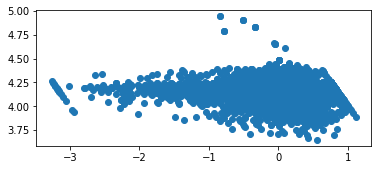

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [ ]:
import statsmodels

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, df[['Category','Reviews','Price','Last_Updated_Days','Paid']])
print('P-Value is: ', pval)

if pval < 0.05: # at alpha = 5%
    print("Reject Null Hypothesis! Errors are not homoscedastic!")
else:
    print("Fail to reject Null Hypothesis! Errors are homoscedastic!")

P-Value is:  3.510053090583922e-225
Reject Null Hypothesis! Errors are not homoscedastic!


Errors are heteroscedastic, so we need to handle them.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(reg.resid)

1.7951063457808867

As the dw value is within 0 to 2, so positive auto-correlation.

## Linear Regression Assumptions

1. LINEARITY - Relationship between X and mean of Y is linear.

2. NORMALITY - Normal distribution.

3. HOMOSCEDASTICITY - Variance of residual is same for any value of X.

4. INDEPENDENCE - Observations are independent of each other.

5. MULTICOLLINEARITY - No or little multicollinearity.

6. AUTO CORRELATION - No auto-correlation.

## Box-Cox Transform on Dependent Variable

In [ ]:
df_new = df.copy()
df_new.head()

,Category,Rating,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid
0,0,4.1,159,10000,0.0,1.0,4,19.0,1169,1,0
1,0,3.9,967,500000,0.0,2.0,4,14.0,1161,1,0
2,0,4.7,87510,5000000,0.0,1.2,4,8.7,963,1,0
3,0,4.5,215644,50000000,0.0,1.0,4,25.0,1017,3,0
4,0,4.3,967,100000,0.0,1.1,4,2.8,1005,1,0


In [ ]:
def plots(df_new, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df_new[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    df_new['transformed_Rating'] = t.fit_transform(df_new[[var]]).flatten()
    sns.kdeplot(df_new['transformed_Rating'])
    plt.title('after ' + str(t).split('(')[0])

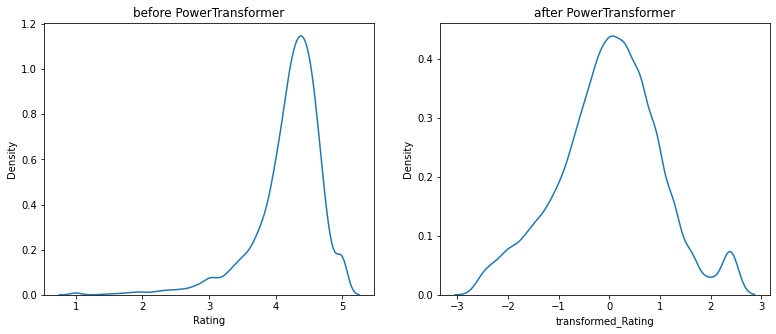

In [ ]:
from sklearn.preprocessing import PowerTransformer

plots(df_new, 'Rating', PowerTransformer(method='box-cox'))

In [ ]:
df_new.head()

,Category,Rating,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid,transformed_Rating
0,0,4.1,159,10000,0.0,1.0,4,19.0,1169,1,0,-0.415943
1,0,3.9,967,500000,0.0,2.0,4,14.0,1161,1,0,-0.824143
2,0,4.7,87510,5000000,0.0,1.2,4,8.7,963,1,0,1.251934
3,0,4.5,215644,50000000,0.0,1.0,4,25.0,1017,3,0,0.614316
4,0,4.3,967,100000,0.0,1.1,4,2.8,1005,1,0,0.061022


Text(0, 0.5, 'Frequency')

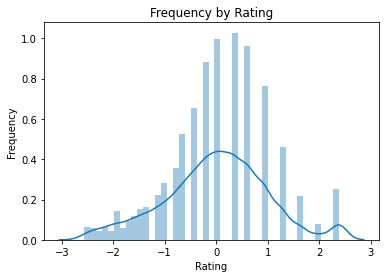

In [ ]:
sns.distplot(df_new['transformed_Rating'])
plt.title('Frequency by Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Transformation has been done. Now run OLS and check homoscedasticity and autocorrelation.

In [ ]:
import statsmodels.formula.api as smf

reg = smf.ols('transformed_Rating ~ Category + Reviews + Price + Last_Updated_Days + Paid', data=df_new).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     transformed_Rating   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     69.55
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.19e-71
Time:                        05:25:15   Log-Likelihood:                -13120.
No. Observations:                9367   AIC:                         2.625e+04
Df Residuals:                    9361   BIC:                         2.630e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5346      0.039     13.866      0.000       0.459       0.610
Category             -0.0046      0.001     -3.756      0.000      -0.007      -0.002
Reviews            1.651e-08   3.24e-09      5.091      0.000    1.02e-08    2.29e-08
Price                -0.0031      0.001     -4.706      0.000      -0.004      -0.002
Last_Updated_Days    -0.0004   2.61e-05    -15.537      0.000      -0.000      -0.000
Paid                  0.3977      0.042      9.521      0.000       0.316       0.480
==============================================================================
Omnibus:                       26.145   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.148
Skew:                          -0.059   Prob(JB):                     1.72e-07
Kurtosis:                       3.256   Cond. No.                     1.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking assumptions on residuals.

In [ ]:
pred_val = reg.fittedvalues.copy()
true_val = df_new['transformed_Rating'].values.copy()
residual = true_val - pred_val

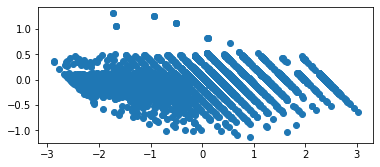

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [ ]:
import statsmodels

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, df_new[['Category','Reviews','Price','Last_Updated_Days','Paid']])
print('P-Value is: ', pval)

if pval < 0.05: # at alpha = 5%
    print("Reject Null Hypothesis! Errors are not homoscedastic!")
else:
    print("Fail to reject Null Hypothesis! Errors are homoscedastic!")

P-Value is:  0.0
Reject Null Hypothesis! Errors are not homoscedastic!


Again Errors are heteroscedastic.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(reg.resid)

1.7625892895457809

Again positive auto-correlation.

So even after normalising our Rating column, we dont see any change in the homoscedasticity test.

## Random Forest

In [ ]:
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000002,0.00001,0.0,0.101010,0.428571,0.189931,0.070976,0.000000,0.0
1,0.0,0.000012,0.00050,0.0,0.202020,0.428571,0.139927,0.068311,0.000000,0.0
2,0.0,0.001120,0.00500,0.0,0.121212,0.428571,0.086922,0.002333,0.000000,0.0
3,0.0,0.002759,0.05000,0.0,0.101010,0.428571,0.249936,0.020327,0.666667,0.0
4,0.0,0.000012,0.00010,0.0,0.111111,0.428571,0.027917,0.016328,0.000000,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.88286071016539

In [ ]:
reg_rf.score(X_test, y_test)

0.16065470189300035

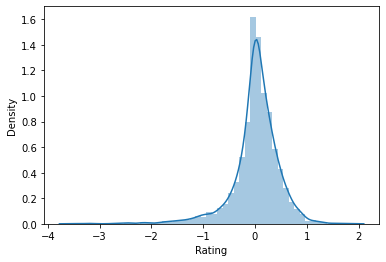

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

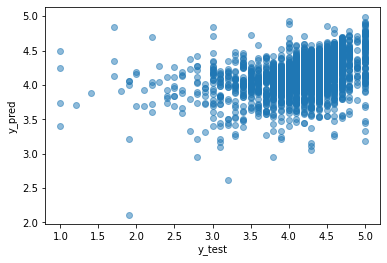

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3030553260151446
MSE: 0.21176455952764328
RMSE: 0.4601788342890656


In [ ]:
metrics.r2_score(y_test, y_pred)

0.16065470189300035

In [ ]:
y_pred

array([4.388, 4.495, 3.779, ..., 4.033, 4.597, 3.446])

In [ ]:
y_test

8636    4.4
3953    4.5
1558    4.2
921     4.4
3771    3.6
       ... 
6484    5.0
8655    4.6
4963    4.5
1030    5.0
6146    5.0
Name: Rating, Length: 2811, dtype: float64

## Random Forest with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 8, 10]

criterion = ['mse']

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : criterion}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse, total=   7.9s
[CV] n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse, total=   7.8s
[CV] n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse 
[CV]  n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse, total=   7.7s
[CV] n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse 
[CV]  n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse, total=   7.7s
[CV] n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse 
[CV]  n_estimators=1100, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=18, criterion=mse, total=   7.7s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, criterion=mse 
[CV]  n_estimators=600, min_s

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 26.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1200}

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
prediction = rf_random.predict(X_test)

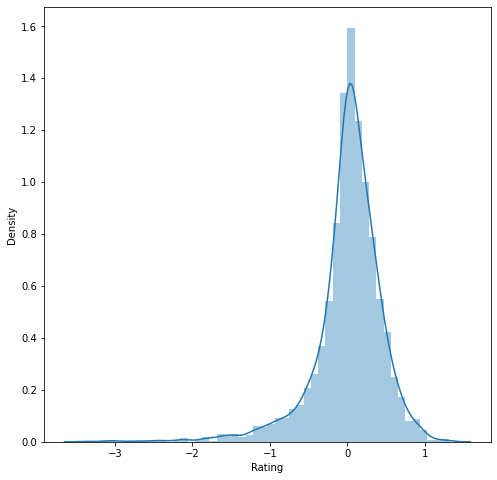

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

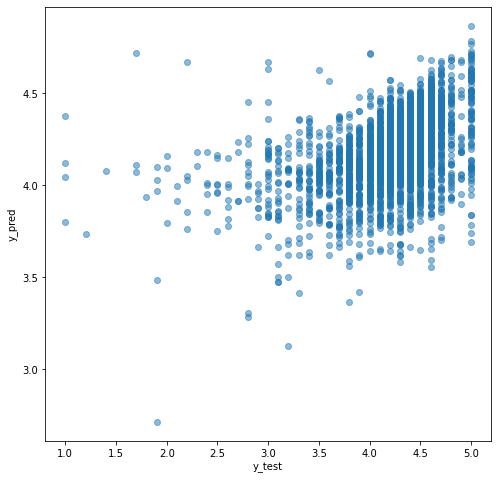

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.3021840839398088
MSE: 0.20400698231349626
RMSE: 0.4516713211102696


In [ ]:
metrics.r2_score(y_test, prediction)

0.19140246239608083

## Linear Regression

In [ ]:
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000002,0.00001,0.0,0.101010,0.428571,0.189931,0.070976,0.000000,0.0
1,0.0,0.000012,0.00050,0.0,0.202020,0.428571,0.139927,0.068311,0.000000,0.0
2,0.0,0.001120,0.00500,0.0,0.121212,0.428571,0.086922,0.002333,0.000000,0.0
3,0.0,0.002759,0.05000,0.0,0.101010,0.428571,0.249936,0.020327,0.666667,0.0
4,0.0,0.000012,0.00010,0.0,0.111111,0.428571,0.027917,0.016328,0.000000,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg_lr.predict(X_test)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3461338755855636
MSE: 0.2442582775040748
RMSE: 0.49422492602465407


In [ ]:
metrics.r2_score(y_test, y_pred)

0.03186332404220149

## Linear Regression 2

In [ ]:
X = df.drop(['Rating','Installs','Price','Current_Ver_Upd','Android_Ver_Upd','Content_Rating'], axis=1)
y = df['Rating']
X.head()

,Category,Reviews,Size_Upd,Last_Updated_Days,Paid
0,0,159,19.0,1142,0
1,0,967,14.0,1134,0
2,0,87510,8.7,936,0
3,0,215644,25.0,990,0
4,0,967,2.8,978,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,0.0,0.000002,0.189931,0.070976,0.0
1,0.0,0.000012,0.139927,0.068311,0.0
2,0.0,0.001120,0.086922,0.002333,0.0
3,0.0,0.002759,0.249936,0.020327,0.0
4,0.0,0.000012,0.027917,0.016328,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg_lr.predict(X_test)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.34721725261380454
MSE: 0.2450474769546918
RMSE: 0.4950227034739839


In [ ]:
metrics.r2_score(y_test, y_pred)

0.028735270652996303

## Support Vector Regressor

In [ ]:
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [ ]:
X.head()

,Category,Reviews,Installs,Price,Current_Ver_Upd,Android_Ver_Upd,Size_Upd,Last_Updated_Days,Content_Rating,Paid
0,0,159,10000,0.0,1.0,4,19.0,1142,1,0
1,0,967,500000,0.0,2.0,4,14.0,1134,1,0
2,0,87510,5000000,0.0,1.2,4,8.7,936,1,0
3,0,215644,50000000,0.0,1.0,4,25.0,990,3,0
4,0,967,100000,0.0,1.1,4,2.8,978,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000002,0.00001,0.0,0.101010,0.428571,0.189931,0.070976,0.000000,0.0
1,0.0,0.000012,0.00050,0.0,0.202020,0.428571,0.139927,0.068311,0.000000,0.0
2,0.0,0.001120,0.00500,0.0,0.121212,0.428571,0.086922,0.002333,0.000000,0.0
3,0.0,0.002759,0.05000,0.0,0.101010,0.428571,0.249936,0.020327,0.666667,0.0
4,0.0,0.000012,0.00010,0.0,0.111111,0.428571,0.027917,0.016328,0.000000,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
from sklearn.svm import SVR

reg_svr = SVR()
reg_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = reg_svr.predict(X_test)

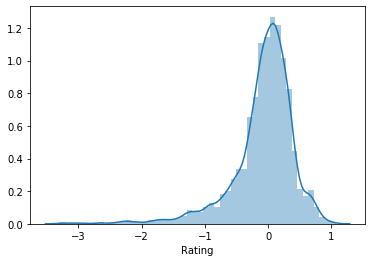

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

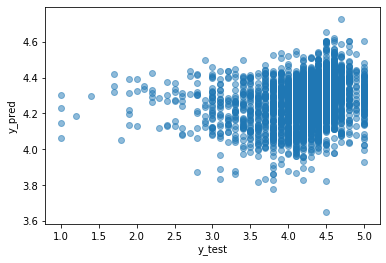

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.32991298825753745
MSE: 0.2457160312574119
RMSE: 0.4956975199225954


In [ ]:
metrics.r2_score(y_test, y_pred)

0.02608540368862311

## Support Vector Regressor 2

In [ ]:
X = df.drop(['Rating','Installs','Price','Current_Ver_Upd','Android_Ver_Upd','Content_Rating'], axis=1)
y = df['Rating']

In [ ]:
X.head()

,Category,Reviews,Size_Upd,Last_Updated_Days,Paid
0,0,159,19.0,1142,0
1,0,967,14.0,1134,0
2,0,87510,8.7,936,0
3,0,215644,25.0,990,0
4,0,967,2.8,978,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4
0,0.0,0.000002,0.189931,0.070976,0.0
1,0.0,0.000012,0.139927,0.068311,0.0
2,0.0,0.001120,0.086922,0.002333,0.0
3,0.0,0.002759,0.249936,0.020327,0.0
4,0.0,0.000012,0.027917,0.016328,0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [ ]:
from sklearn.svm import SVR

reg_svr = SVR()
reg_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = reg_svr.predict(X_test)

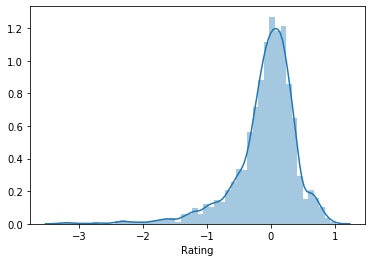

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

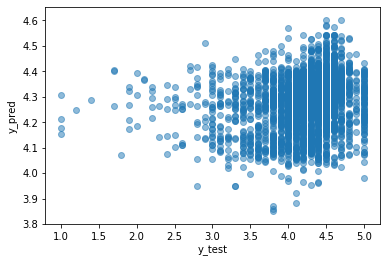

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3337515478274594
MSE: 0.24917734963373794
RMSE: 0.4991766717643543


In [ ]:
metrics.r2_score(y_test, y_pred)

0.010050223531826608